<a href="https://colab.research.google.com/github/DuilioEGomez/BigData_And_MachineLearning/blob/main/Grupo_23_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UPSO 2023 - Machine Learning & Big Data - Grupo 23 - Galvez, Juan Manuel Ignacio - Gomez, Duilio Enrique - Munuce, Juan Jose.

En el cuaderno se incluyen las metricas Precision, Recall y F1 Score, ademas se graficaron las matrices de confusion de los modelos KNN, SVM, Decision Tree y Naive Bayes en un solo plot, tambien se grafica la matriz de confusion y sus metricas del Ensamble, luego se hizo un plot con los 4 modelos KNN, SVM, Decision Tree y Naive Bayes con los hiperparametros ajustados con Random Search y o Grid Search sin olvidar sus metricas Precision, Recall, F1 Score y Naive Bayes y por ultimo para una mejor analisis se grafican en Barras de colores todas las metricas en 3 plots: Precision, Recall y F1 Score.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* Se Importan las librerias y modulos necesarios.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import uniform

Se descarga el archivo CSV, se crea el Dataframe a partir de dicho archivo.

In [3]:
url_csv = "/content/drive/MyDrive/Colab Notebooks/Canciones_Spotify.csv"
df_spotify = pd.read_csv(url_csv)

Se elimina la columna "loudness" del dataframe ya que posee numeros negativos y no es relevante al proyecto.

In [4]:
df_spotify.drop("loudness", axis=1, inplace=True)

Se ve el Dataframe que vamos a utilizar.

In [5]:
df_spotify

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


Se Dividen los datos en X e Y, en X iran las columnas que destacan a la hora de la preferencia de una cancion y en Y se carga el Target.

In [6]:
X = df_spotify[["acousticness","danceability","energy","instrumentalness","liveness", "speechiness", "tempo","valence"]]
y = df_spotify['target']

Se dividen los datos en conjuntos de entrenamiento "train" y prueba "test".

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Se escala las caracteristicas, dependiendo el modelo.

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Se definen los modelos de clasificacion.

In [9]:
knn = KNeighborsClassifier()
svm = SVC()
decision_tree = DecisionTreeClassifier()
naive_bayes = GaussianNB()

Se entrenan los modelos.

In [10]:
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)

GaussianNB()

Se hace la validación cruzada k-fold para evaluación de modelos.

In [11]:
knn_scores = cross_val_score(knn, X_train, y_train, cv=5)
svm_scores = cross_val_score(svm, X_train, y_train, cv=5)
decision_tree_scores = cross_val_score(decision_tree, X_train, y_train, cv=5)
naive_bayes_scores = cross_val_score(naive_bayes, X_train, y_train, cv=5)

Se hace la evaluación de rendimiento en el conjunto de prueba.

In [12]:
knn_pred = knn.predict(X_test)
svm_pred = svm.predict(X_test)
decision_tree_pred = decision_tree.predict(X_test)
naive_bayes_pred = naive_bayes.predict(X_test)

Se hacen las Matrices de confusión y métricas de rendimiento.

In [13]:
confusion_knn = confusion_matrix(y_test, knn_pred)
confusion_svm = confusion_matrix(y_test, svm_pred)
confusion_decision_tree = confusion_matrix(y_test, decision_tree_pred)
confusion_naive_bayes = confusion_matrix(y_test, naive_bayes_pred)

precision_knn = precision_score(y_test, knn_pred)
recall_knn = recall_score(y_test, knn_pred)
f1_score_knn = f1_score(y_test, knn_pred)

precision_svm = precision_score(y_test, svm_pred)
recall_svm = recall_score(y_test, svm_pred)
f1_score_svm = f1_score(y_test, svm_pred)

precision_decision_tree = precision_score(y_test, decision_tree_pred)
recall_decision_tree = recall_score(y_test, decision_tree_pred)
f1_score_decision_tree = f1_score(y_test, decision_tree_pred)

precision_naive_bayes = precision_score(y_test, naive_bayes_pred)
recall_naive_bayes = recall_score(y_test, naive_bayes_pred)
f1_score_naive_bayes = f1_score(y_test, naive_bayes_pred)


Se Crean y grafican las matrices de confusión para los cuatro modelos en un Plot.

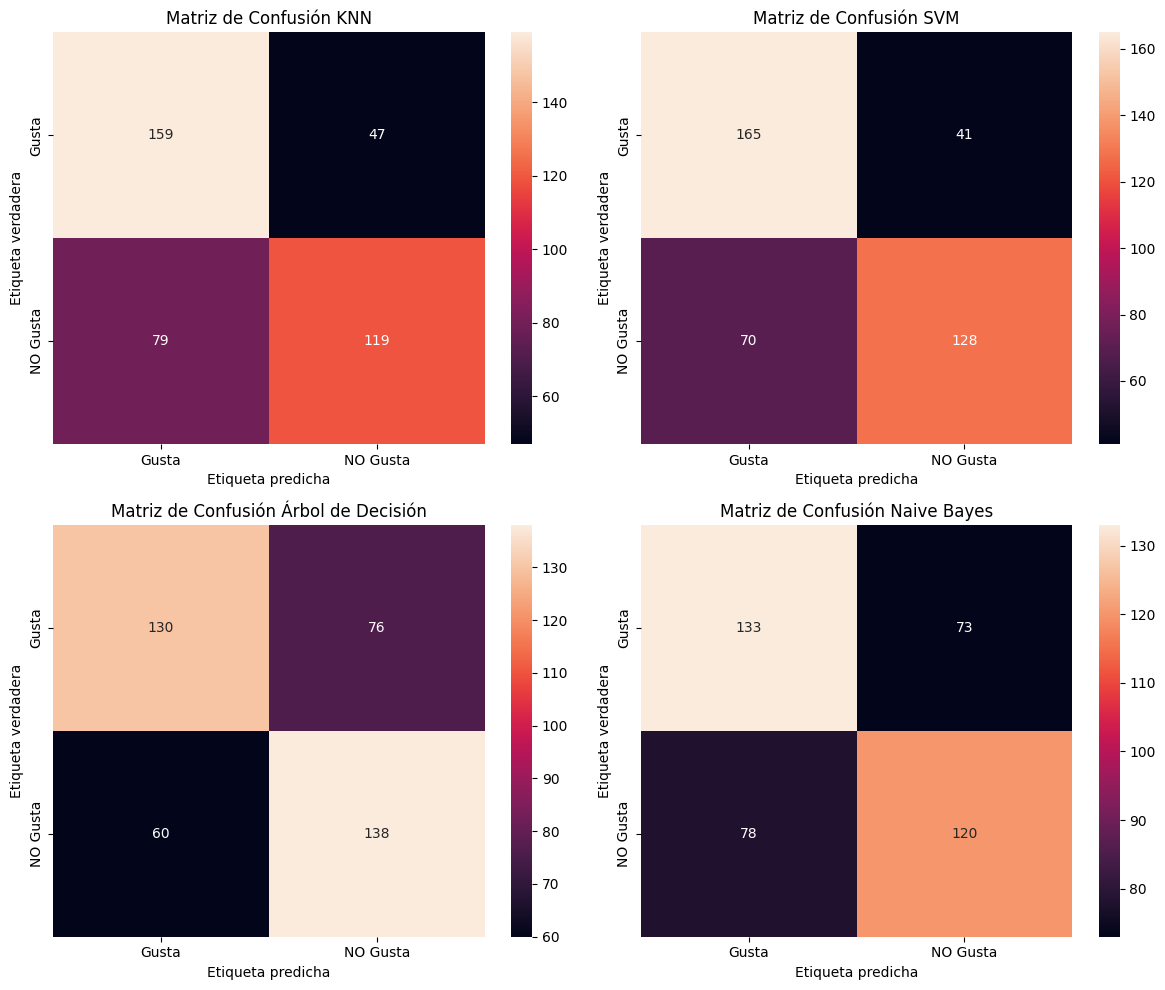

In [14]:
confusion_matrices = [
    confusion_matrix(y_test, knn_pred),
    confusion_matrix(y_test, svm_pred),
    confusion_matrix(y_test, decision_tree_pred),
    confusion_matrix(y_test, naive_bayes_pred)
]

modelos = ['KNN', 'SVM', 'Árbol de Decisión', 'Naive Bayes']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, ax in enumerate(axes.ravel()):
    sns.heatmap(confusion_matrices[i], annot=True, fmt='g', xticklabels=['Gusta', 'NO Gusta'], yticklabels=['Gusta', 'NO Gusta'], ax=ax)
    ax.set_xlabel('Etiqueta predicha')
    ax.set_ylabel('Etiqueta verdadera')
    ax.set_title(f'Matriz de Confusión {modelos[i]}')

plt.tight_layout()
plt.show()

Metricas de los modelos KNN, SVM, Decision Tree y Naive Bayes:

In [15]:
print("Precision KNN:           ", precision_knn)
print("Recall KNN:              ", recall_knn)
print("F1 Score KNN:            ", f1_score_knn)
print("")
print("Precision SVM:           ", precision_svm)
print("Recall SVM:              ", recall_svm)
print("F1 Score SVM:            ", f1_score_svm)
print("")
print("Precision Decision Tree: ", precision_decision_tree)
print("Decision Tree Recall:    ", recall_decision_tree)
print("Decision Tree F1 Score:  ", f1_score_decision_tree)
print("")
print("Precision Naive Bayes:   ", precision_naive_bayes)
print("Naive Bayes Recall:      ", recall_naive_bayes)
print("Naive Bayes F1 Score:    ", f1_score_naive_bayes)


Precision KNN:            0.7168674698795181
Recall KNN:               0.601010101010101
F1 Score KNN:             0.6538461538461539

Precision SVM:            0.757396449704142
Recall SVM:               0.6464646464646465
F1 Score SVM:             0.6975476839237057

Precision Decision Tree:  0.6448598130841121
Decision Tree Recall:     0.696969696969697
Decision Tree F1 Score:   0.6699029126213593

Precision Naive Bayes:    0.6217616580310881
Naive Bayes Recall:       0.6060606060606061
Naive Bayes F1 Score:     0.6138107416879796


Ensamble de modelos (Votación Mayoritaria)

In [16]:
ensamble = VotingClassifier(estimators=[('knn', knn), ('svm', svm), ('decision_tree', decision_tree), ('naive_bayes', naive_bayes)], voting='hard')
ensamble.fit(X_train, y_train)
ensamble_pred = ensamble.predict(X_test)

Evaluación del rendimiento del ensamble.

In [17]:
confusion_ensamble = confusion_matrix(y_test, ensamble_pred)
precision_ensamble = precision_score(y_test, ensamble_pred)
recall_ensamble = recall_score(y_test, ensamble_pred)
f1_score_ensamble = f1_score(y_test, ensamble_pred)

Metricas del Ensamble

In [18]:
print("Precision Ensamble:", precision_ensamble)
print("Recall Ensamble:   ", recall_ensamble)
print("F1 Score Ensamble: ", f1_score_ensamble)

Precision Ensamble: 0.773972602739726
Recall Ensamble:    0.5707070707070707
F1 Score Ensamble:  0.6569767441860465


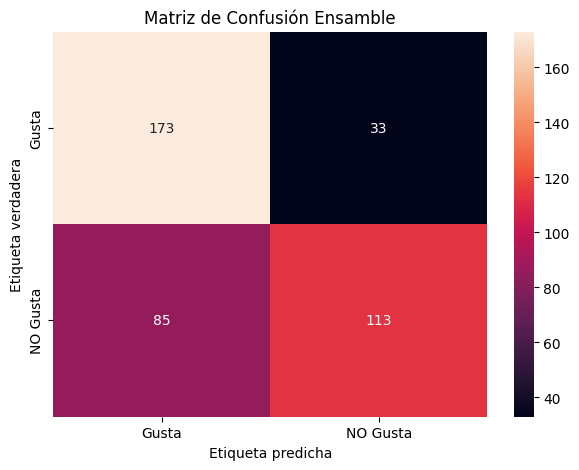

In [19]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_ensamble, annot=True, fmt='g', xticklabels=['Gusta', 'NO Gusta'], yticklabels=['Gusta', 'NO Gusta'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión Ensamble')
plt.show()

******** SECCION Busqueda de los Mejores Hiperparametros usando GRID SEARCH y o RANDOM SEARCH ******



En el ajuste por Grid Search tuvimos que bajar la configuracion por que el colab no respondia


In [20]:
param_grid = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01]
}

svm = SVC()

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_paramsSVM = grid_search.best_params_
best_scoreSVM = grid_search.best_score_
print("Mejores hiperparámetros:", best_paramsSVM)
print("Puntuación de precisión:", best_scoreSVM)

best_svm = SVC(**best_paramsSVM)
best_svm.fit(X_train, y_train)

Mejores hiperparámetros: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Puntuación de precisión: 0.6552987327654174


SVC(C=1, gamma=0.01)

RANDOM SEARCH, Se selecciona aleatoriamente un número especificado de combinaciones de hiperparámetros para evaluar en el Clasificador KNN:


In [21]:
param_dist = {
    'n_neighbors': np.arange(1, 31),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()

random_searchKNN = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')
random_searchKNN.fit(X_train, y_train)

best_paramsKNN = random_searchKNN.best_params_
best_scoreKNN = random_searchKNN.best_score_
print("Mejores hiperparámetros:", best_paramsKNN)
print("Puntuación de precisión:", best_scoreKNN)

best_knn = KNeighborsClassifier(**best_paramsKNN)
best_knn.fit(X_train, y_train)

Mejores hiperparámetros: {'weights': 'distance', 'p': 2, 'n_neighbors': 12}
Puntuación de precisión: 0.6838163182893293


KNeighborsClassifier(n_neighbors=12, weights='distance')

RANDOM SEARCH para el modelo Decision Tree:

In [22]:
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 21),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11)
}

decision_tree = DecisionTreeClassifier()

random_searchDT = RandomizedSearchCV(decision_tree, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')
random_searchDT.fit(X_train, y_train)

best_paramsDT = random_searchDT.best_params_
best_scoreDT = random_searchDT.best_score_
print("Mejores hiperparámetros:", best_paramsDT)
print("Puntuación de precisión:", best_scoreDT)

best_decision_tree = DecisionTreeClassifier(**best_paramsDT)
best_decision_tree.fit(X_train, y_train)

Mejores hiperparámetros: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_depth': 4, 'criterion': 'gini'}
Puntuación de precisión: 0.7253619983462494


DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)

BEST NAIVE BAYES con RANDOM SEARCH, en el modelo Naive Bayes no hay Hiperparametros a ajustar.

In [23]:
param_dist = {
    'priors': [None],  # No hay hiperparámetros específicos para ajustar en Naive Bayes
}

random_searchNB = RandomizedSearchCV(GaussianNB(), param_distributions=param_dist, n_iter=1, cv=5, scoring='accuracy')
random_searchNB.fit(X_train, y_train)

y_pred_best_naive_bayes = random_searchNB.predict(X_test)

******* SECCION BEST PARAMETERS, solo configuramos los modelos con los mejores parametros *******************


Aca usamos los mejores parametros obtenidos.

Aqui hacemos un modelo KNN con los mejores hiperparametros.

In [24]:
knnBest = KNeighborsClassifier(**best_paramsKNN)
knnBest.fit(X_train, y_train)
knnBest_scores = cross_val_score(knnBest, X_train, y_train, cv=5)
knnBest_pred = knnBest.predict(X_test)
confusion_knnBest = confusion_matrix(y_test, knnBest_pred)

Aqui Hacemos un modelo SVM con los mejores hiperparametros.

In [25]:
svmBest = SVC(**best_paramsSVM)
svmBest.fit(X_train, y_train)
svmBest_scores = cross_val_score(svmBest, X_train, y_train, cv=5)
svmBest_pred = svmBest.predict(X_test)
confusion_svmBest = confusion_matrix(y_test, svmBest_pred)

Aqui hacemos el modelo BEST DECISION TREE con los mejores hiperparametros

In [26]:
decision_tree_Best = DecisionTreeClassifier(**best_paramsDT)
decision_tree_scores_Best = cross_val_score(decision_tree_Best, X_train, y_train, cv=5)
decision_tree_Best.fit(X_train, y_train)
decision_tree_pred_Best = decision_tree_Best.predict(X_test)
confusion_decision_tree_Best = confusion_matrix(y_test, decision_tree_pred_Best)

Metricas BEST SVM

In [27]:
precision_svmBest = precision_score(y_test, svmBest_pred)
recall_svmBest = recall_score(y_test, svmBest_pred)
f1_score_svmBest = f1_score(y_test, svmBest_pred)

Metricas model BEST KNN

In [28]:
precision_knnBest = precision_score(y_test, knnBest_pred)
recall_knnBest = recall_score(y_test, knnBest_pred)
f1_score_knnBest = f1_score(y_test, knnBest_pred)

Metricas BEST DECISION TREE


In [29]:
precision_decision_tree_Best = precision_score(y_test, decision_tree_pred_Best)
recall_decision_tree_Best = recall_score(y_test, decision_tree_pred_Best)
f1_score_decision_tree_Best = f1_score(y_test, decision_tree_pred_Best)

Metricas BEST NAIVE BAYES

In [30]:
confusionNB = confusion_matrix(y_test, y_pred_best_naive_bayes)
precisionNB = precision_score(y_test, y_pred_best_naive_bayes)
recallNB = recall_score(y_test, y_pred_best_naive_bayes)
f1_score_NB = f1_score(y_test, y_pred_best_naive_bayes)

Se muestran las metricas obtenidas con los modelos usando los mejores hiperparametros.

In [31]:
print("Best Precision KNN:", precision_knnBest)
print("Best RECALL KNN:   ", recall_knnBest)
print("Best F1 SCORE KNN: ", f1_score_knnBest)
print("")
print("Best Precision SVM:", precision_svmBest)
print("Best RECALL SVM:   ", recall_svmBest)
print("Best F1 SCORE SVM: ", f1_score_svmBest)
print("")
print("Best Precision Decision Tree:", precision_decision_tree_Best)
print("Best Recall Decision Tree:   ", recall_decision_tree_Best)
print("Best F1 SCORE Decision Tree: ", f1_score_decision_tree_Best)
print("")
print("BEST Precision Naive Bayes:", precisionNB)
print("BEST Recall Naive Bayes:   ", recallNB)
print("BEST F1 Score Naive Bayes  ", f1_score_NB)

Best Precision KNN: 0.7195121951219512
Best RECALL KNN:    0.5959595959595959
Best F1 SCORE KNN:  0.6519337016574586

Best Precision SVM: 0.7251908396946565
Best RECALL SVM:    0.4797979797979798
Best F1 SCORE SVM:  0.5775075987841946

Best Precision Decision Tree: 0.6352941176470588
Best Recall Decision Tree:    0.8181818181818182
Best F1 SCORE Decision Tree:  0.7152317880794701

BEST Precision Naive Bayes: 0.6217616580310881
BEST Recall Naive Bayes:    0.6060606060606061
BEST F1 Score Naive Bayes   0.6138107416879796


Se Calculan y dibujan las matrices de confusion con los mejores hiperparametros "BEST"

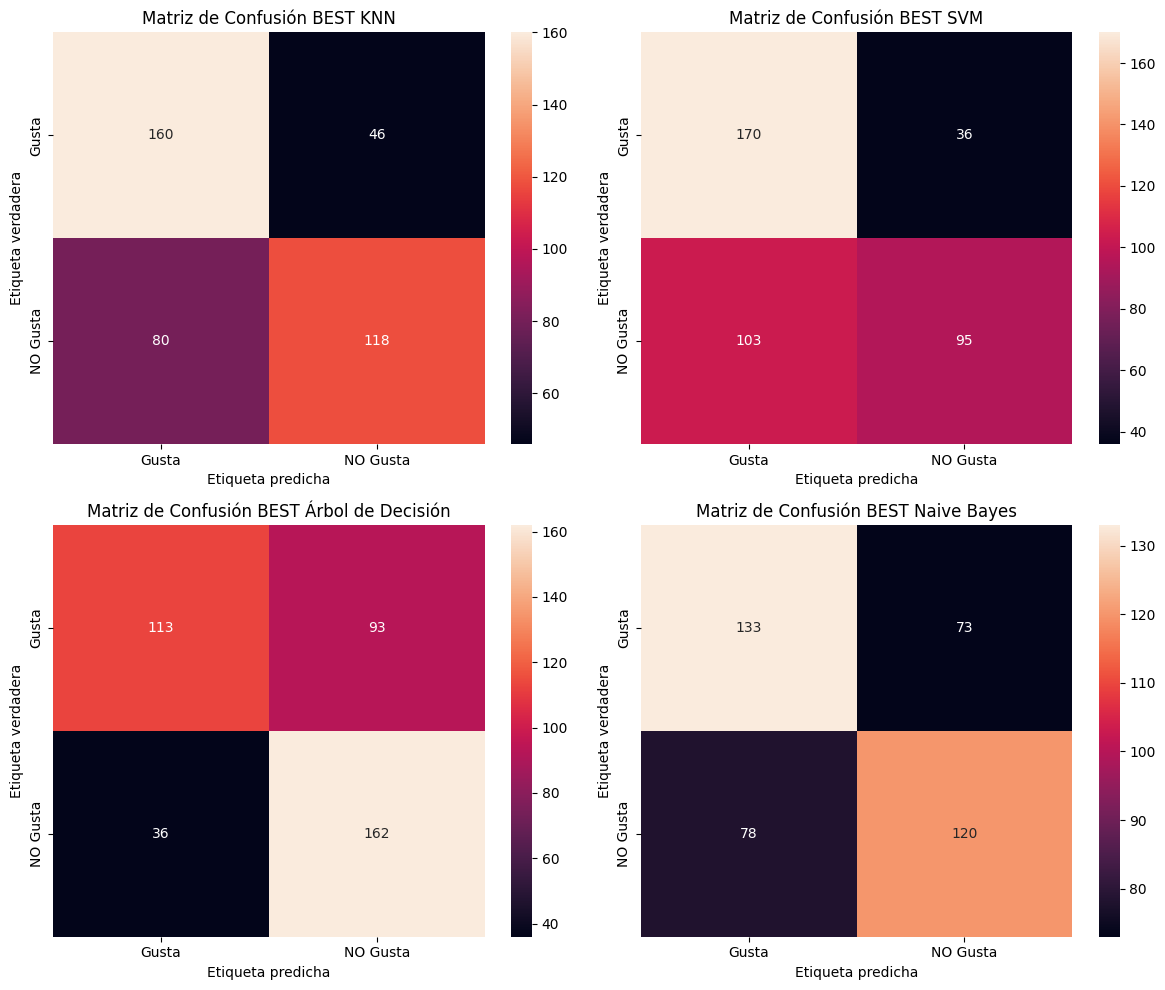

In [32]:
confusion_matrices_best = [
    confusion_matrix(y_test, knnBest_pred),
    confusion_matrix(y_test, svmBest_pred),
    confusion_matrix(y_test, decision_tree_pred_Best),
    confusion_matrix(y_test, y_pred_best_naive_bayes)
]

modelos = ['KNN', 'SVM', 'Árbol de Decisión', 'Naive Bayes']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, ax in enumerate(axes.ravel()):
    sns.heatmap(confusion_matrices_best[i], annot=True, fmt='g', xticklabels=['Gusta', 'NO Gusta'], yticklabels=['Gusta', 'NO Gusta'], ax=ax)
    ax.set_xlabel('Etiqueta predicha')
    ax.set_ylabel('Etiqueta verdadera')
    ax.set_title(f'Matriz de Confusión BEST {modelos[i]}')

plt.tight_layout()
plt.show()

Se Grafican todas las metricas Precision para una mejor visualizacion y referencia de los valores obtenidos, se destaca el Modelo Ensamble.

In [33]:
categoriasP = ['Precision KNN', 'Precision SVM', 'Precision Decision Tree', 'Precision Ensamble', 'Best Precision KNN', 'Best Precision SVM', 'Best Precision Decision Tree', 'BEST Precision Naive Bayes']
valoresP = [precision_knn, precision_svm, precision_decision_tree, precision_ensamble, precision_knnBest, precision_svmBest, precision_decision_tree_Best, precisionNB]

dataP = pd.DataFrame({'Categorías': categoriasP, 'Valores': valoresP})

fig = px.bar(dataP, x='Categorías', y='Valores', title='Metricas Precision',
             labels={'Categorías': 'Categorías', 'Valores': 'Valores'},
             text='Valores', color=categoriasP)

fig.show()

Se Grafican todas las metricas Recall para una mejor visualizacion y referencia de los valores obtenidos, Se destaca el modelo Decision Tree.

In [34]:
categoriasR = ['Recall KNN', 'Recall SVM', 'Recall Decision Tree', 'Recall Naive Bayes', 'Recall Ensamble', 'Best Recall KNN', 'Best Recall SVM', 'Best Recall Decision Tree', 'BEST Recall Naive Bayes']
valoresR = [recall_knn, recall_svm, recall_decision_tree, recall_naive_bayes, recall_ensamble, recall_knnBest, recall_svmBest, recall_decision_tree_Best, recallNB]

dataR = pd.DataFrame({'Categorías': categoriasR, 'Valores': valoresR})

fig = px.bar(dataR, x='Categorías', y='Valores', title='Metricas Recall',
             labels={'Categorías': 'Categorías', 'Valores': 'Valores'},
             text='Valores', color=categoriasR)

fig.show()

Se Grafican todas las metricas F1 Score para una mejor visualizacion y referencia de los valores obtenidos, Se destaca el modelo BEST Decision Tree.

In [35]:
categoriasF = ['F1 Score KNN', 'F1 Score SVM', 'Decision Tree F1 Score', 'Naive Bayes F1 Score', 'F1 Score Ensamble', 'Best KNN F1 Score', 'Best SVM F1 Score', 'Best Decision Tree F1 SCORE', 'BEST Naive Bayes F1 Score']
valoresF = [f1_score_knn, f1_score_svm, f1_score_decision_tree, f1_score_naive_bayes, f1_score_ensamble, f1_score_knnBest, f1_score_svmBest, f1_score_decision_tree_Best, f1_score_NB]

dataF = pd.DataFrame({'Categorías': categoriasF, 'Valores': valoresF})

fig = px.bar(dataF, x='Categorías', y='Valores', title='Metricas F1 Score',
             labels={'Categorías': 'Categorías', 'Valores': 'Valores'},
             text='Valores', color=categoriasF)

fig.show()